# Task 01 - Prediction using Supervised ML

# By Gaurav Wankhede

Here I predict the percentage of marks of an student based on the number of study hours and I also predict if a student studies for 9.25hr/day using LinearRegression

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_csv("C:/Users/HP/Desktop/GAURAV/data/Student.csv")

In [3]:
# Top 10 dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Shape of data
data.shape

(25, 2)

In [7]:
# Let's check missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Let's print the summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Let's see the basic statistical details
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


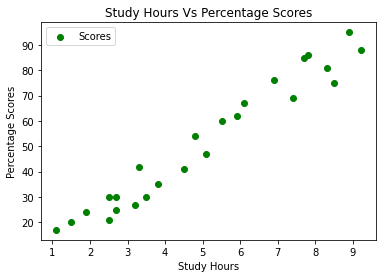

In [10]:
# Plotting Scores Distribution 
plt.scatter(x='Hours', y='Scores', data=data, color='green')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.title('Study Hours Vs Percentage Scores')
plt.legend()

In [11]:
# select the Data as attribute(input) and Label(output)
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [12]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [13]:
# Import the Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [14]:
# Prediction of values
y_pred = lin_reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Actual Vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
lin_reg.intercept_

2.0181600414346974

In [17]:
lin_reg.coef_

array([9.91065648])

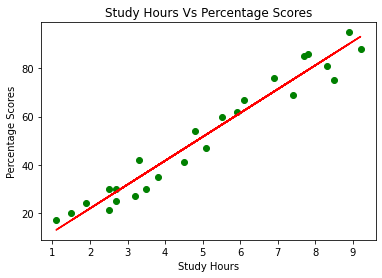

In [28]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_
plt.scatter(X,y,color='green')
plt.plot(X,line, color='red')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.title('Study Hours Vs Percentage Scores')
plt.show()

In [21]:
# Model Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367


In [24]:
# Test my Prediction
Hrs=9.25
my_pred = lin_reg.predict([[Hrs]])
my_pred

print("No of Hours = {}".format(Hrs))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535
